<a href="https://colab.research.google.com/github/minhcong01/CAMXUC/blob/main/train_c%E1%BA%A3m_x%C3%BAc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


https://drive.google.com/drive/folders/1qhkm4DSEDlOTkCaln8MHDjCghgNdm-0j?usp=sharing
 test
https://drive.google.com/drive/folders/1p-3qX0TCBUHXNWxPEYow_zdNmxo79RE_?usp=sharing

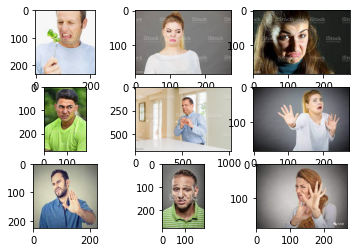

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/CAMXUC/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'Ghetom'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/CAMXUC/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Buon'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Ghetom'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hanhphuc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Sohai'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('NhanDangCamXuc_photos.npy', photos)
save('NhanDangCamXuc_labels.npy', labels)

(40, 150, 150, 3) (40,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 32)                5607456   
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 5,608,484
Trainable params: 5,608,484
Non-trainable params: 0
______________________________________________

In [6]:
model.save('NhanDangCamXuc.h5')

In [7]:
from keras.models import load_model
models=load_model('NhanDangCamXuc.h5')

Giá trị: 0
Buon


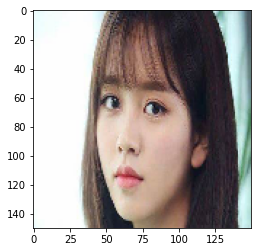

In [9]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/CAMXUC/Buon2.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if np.argmax(models.predict(img)) == 0:
   print("Buon")
if np.argmax(models.predict(img)) == 1:
   print("Ghetom")
if np.argmax(models.predict(img)) == 2:
   print("Hanhphuc")
if np.argmax(models.predict(img)) == 3:
   print("Sohai")

Ảnh: Sohai


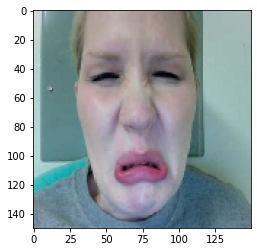

In [21]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('NhanDangCamXuc.h5')
img = load_img('/content/drive/MyDrive/TEST/Sohai20.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['Buon','Ghetom','Hanhphuc','Sohai']
print('Ảnh:',a[pred])

Ảnh: Ghetom


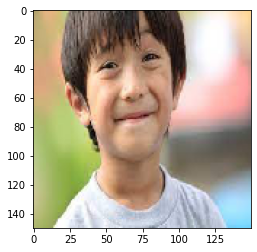

In [23]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('NhanDangCamXuc.h5')
img = load_img('/content/drive/MyDrive/TEST/Hanhphuc11.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['Buon','Ghetom','Hanhphuc','Sohai']
print('Ảnh:',a[pred])

Ảnh: Hanhphuc


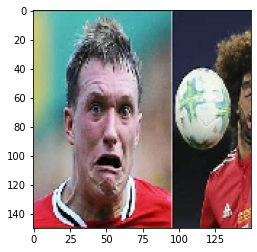

In [24]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('NhanDangCamXuc.h5')
img = load_img('/content/drive/MyDrive/TEST/Ghetom13.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['Buon','Ghetom','Hanhphuc','Sohai']
print('Ảnh:',a[pred])